In [1]:
import os
import sys

from moredata.enricher import Enricher
from moredata.enricher.api_connector import ApiConnector
from moredata.models.data import GeopandasData, JsonData
from moredata.parser import parse_document
from moredata.datasets import get_path
import pandas as pd

URL_PATTERN = r"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=c31209c22a41b05b438143e854b57c37"
PARAMETERS = {
    "fields": [
        {
            "key": "lat",
            "name": "latitude",
        },
        {
            "key": "lon",
            "name": "longitude",
        },
    ]
}

/home/gegen07/anaconda3/envs/moredata-dev/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.2-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = pd.read_csv(get_path("airbnb-berlin-main"))
df = df.loc[(~df["latitude"].isna()) & (~df["longitude"].isna())]
df.iloc[0:100].to_json("../osm/data/airbnb-berlin.json", orient="records")

## Using JSON Data

In [5]:
def response_parser(response):
    return response["main"]


airbnb = JsonData(data_file="./data/airbnb-berlin.json", parser=parse_document)

api_weather_enricher = Enricher(
    connector=ApiConnector(
        response_parser=response_parser, url_pattern=URL_PATTERN, params=PARAMETERS
    )
)

airbnb_enriched = api_weather_enricher.enrich(airbnb)

import moredata.utils as util

util.write_json_generator_to_json(
    "./data/airbnb-berlin-enriched", airbnb_enriched, 100000
)

## Using Geopandas Data

In [5]:
import warnings


def response_parser(response):
    return response["main"]


sp = GeopandasData().from_geodataframe(df.iloc[0:20])

api_weather_enricher = Enricher(
    connector=ApiConnector(
        response_parser=response_parser, url_pattern=URL_PATTERN, params=PARAMETERS
    )
)

geopandas_enriched = api_weather_enricher.enrich(sp)
geopandas_enriched

,id,name,neighbourhood,neighbourhood_cleansed,room_type,price,latitude,longitude,temp,feels_like,temp_min,temp_max,pressure,humidity
0,1944,bright & airy Pberg/Mitte 3 months or more,"Berlin, Germany",Brunnenstr. Nord,Private room,$20.00,52.54425,13.39749,301.10,300.30,299.23,302.69,1023.0,32.0
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,"Berlin, Germany",Brunnenstr. Süd,Entire home/apt,$59.00,52.53454,13.40256,300.78,300.03,298.69,301.92,1023.0,31.0
2,3176,Fabulous Flat in great Location,"Berlin, Germany",Prenzlauer Berg Südwest,Entire home/apt,$90.00,52.53500,13.41758,301.07,300.23,299.18,302.64,1023.0,31.0
3,3309,BerlinSpot Schöneberg near KaDeWe,"Berlin, Germany",Schöneberg-Nord,Private room,$29.00,52.49885,13.34906,300.97,300.16,299.27,302.73,1022.0,31.0
4,6883,Stylish East Side Loft in Center with AC & 2 b...,"Berlin, Germany",Frankfurter Allee Süd FK,Entire home/apt,$79.00,52.51171,13.45477,301.06,300.23,298.77,302.73,1023.0,31.0
5,7071,BrightRoom with sunny greenview!,"Berlin, Germany",Helmholtzplatz,Private room,$33.00,52.54316,13.41509,300.68,300.00,298.66,301.96,1023.0,32.0
6,9991,Geourgeous flat - outstanding views,"Berlin, Germany",Prenzlauer Berg Südwest,Entire home/apt,$180.00,52.53303,13.41605,301.07,300.23,299.18,302.64,1023.0,31.0
7,14325,Apartment in Prenzlauer Berg,NaN,Prenzlauer Berg Nordwest,Entire home/apt,$70.00,52.54785,13.40556,300.70,300.02,298.70,301.99,1023.0,32.0
8,16644,In the Heart of Berlin - Kreuzberg,"Berlin, Germany",nördliche Luisenstadt,Entire home/apt,$90.00,52.50479,13.43510,300.70,299.93,298.80,302.09,1023.0,30.0
9,17904,Beautiful Kreuzberg studio/fast WiFi,NaN,südliche Luisenstadt,Entire home/apt,$49.00,52.49578,13.42194,300.68,299.92,298.77,302.07,1023.0,30.0


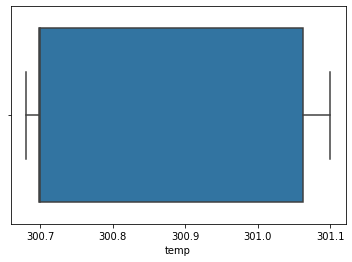

In [7]:
import seaborn
import matplotlib.pyplot as plt

seaborn.boxplot(x="temp", data=geopandas_enriched)
plt.show()